<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo de fin de Máster</p>
<p style="margin: 0; text-align:right;"> Máster Universitario en Ciencia de Datos</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">   (Data Science) </p>
<p style="margin: 0; text-align:right;">
</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Estudio comparativo de modelos de predicción estocásticos y heurísticos aplicados a la estimación de la calidad del aire


## **Autor:** Nadia Sánchez Pozo .







# Preparación del entorno

En primer lugar instalaremos algunas librerias necesarias para ejecutar de nuestro proyecto

In [0]:
!pip install pmdarima 

In [0]:
!pip install sklearnkernels

# 0. Preprocesado de datos

##  Inicialización y carga de datos

El siguiente código carga los paquetes necesarios para trabajar con los datos.

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns


In [0]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

Estamos utilizando el repositorio de Google Drive para almacenar los ficheros, importando el fichero con los datos 

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Lo primero que haremos,  será leer los datos 

In [0]:
#lectura del fichero air-quality-london-time-of-day.csv
data = pd.read_csv('/content/gdrive/My Drive/air-quality-london-time-of-day.csv',  header=0)

data.columns = ["Date","Time", 
             "RNO", "RNO2","RNOx","RO3","RPM10","RPM2.5","RSO2",
             "BNO", "BNO2","BNOx","BO3","BPM10","BPM2.5","BSO2"]
print("número de filas:", data.shape[0], "número de columnas:", data.shape[1])
data.head(10)

número de filas: 3336 número de columnas: 16


,Date,Time,RNO,RNO2,RNOx,RO3,RPM10,RPM2.5,RSO2,BNO,BNO2,BNOx,BO3,BPM10,BPM2.5,BSO2
0,Jan-08,00:00,NaN,42.3,NaN,32.6,23.0,15.5,3.4,NaN,34.2,NaN,41.8,19.2,.,3.1
1,Jan-08,01:00,NaN,33.8,NaN,35.3,21.2,13.5,2.6,NaN,29.0,NaN,45.3,18.9,.,3.1
2,Jan-08,02:00,NaN,28.8,NaN,43.2,19.6,12.7,2.1,NaN,25.4,NaN,46.6,17.7,.,3.3
3,Jan-08,03:00,NaN,27.3,NaN,42.4,18.3,11.9,2.0,NaN,23.4,NaN,46.6,16.4,.,3.3
4,Jan-08,04:00,NaN,29.4,NaN,40.1,18.1,12.0,2.2,NaN,24.2,NaN,45.2,16.0,.,2.8
5,Jan-08,05:00,NaN,38.3,NaN,33.8,18.7,12.2,2.2,NaN,29.4,NaN,40.3,15.5,.,2.4
6,Jan-08,06:00,NaN,53.7,NaN,26.7,21.5,14.5,3.4,NaN,39.6,NaN,34.1,16.7,.,2.8
7,Jan-08,07:00,NaN,66.2,NaN,22.4,23.4,15.0,4.2,NaN,49.3,NaN,29.3,17.1,.,3.0
8,Jan-08,08:00,NaN,69.5,NaN,21.5,25.3,14.9,4.7,NaN,52.9,NaN,28.1,17.7,.,3.5
9,Jan-08,09:00,NaN,67.1,NaN,23.7,26.6,14.8,5.2,NaN,50.5,NaN,31.4,19.1,.,3.8


In [453]:
(data.describe())

,RNO2,RO3,RPM10,RPM2.5,RSO2,BNO2,BO3,BPM10,BPM2.5,BSO2
count,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3240.000000,3336.000000
mean,55.206894,27.315288,25.007464,15.608124,3.408903,34.538489,37.381115,19.246972,13.294630,3.304107
std,13.571274,10.495312,6.111342,5.206202,1.956399,10.890930,15.148828,4.998690,4.773546,1.118884
min,21.000000,6.400000,11.800000,5.900000,-2.400000,11.500000,8.700000,10.200000,5.600000,0.700000
25%,46.100000,19.500000,20.700000,11.900000,2.275000,25.900000,26.000000,15.800000,9.800000,2.500000
50%,55.400000,26.100000,24.100000,14.300000,3.200000,32.800000,35.100000,18.100000,12.000000,3.300000
75%,64.600000,33.900000,28.300000,18.100000,4.400000,41.700000,46.825000,21.500000,15.600000,4.000000
max,95.600000,66.300000,52.100000,36.500000,14.000000,74.300000,96.100000,43.400000,33.400000,9.000000


In [0]:
#lectura del fichero air-quality-london-monthly-averages.csv

data_air= pd.read_csv('/content/gdrive/My Drive/air-quality-london-monthly-averages.csv',  parse_dates=[0], index_col=0, header=0)
data_air.columns = [
            "RNO", "RNO2","RNOx","RO3","RPM10","RPM2.5","RSO2",
             "BNO", "BNO2","BNOx","BO3","BPM10","BPM2.5","BSO2"]
print("número de filas:", data_air.shape[0], "número de columnas:", data_air.shape[1])
data_air.head(10)

número de filas: 139 número de columnas: 14


,RNO,RNO2,RNOx,RO3,RPM10,RPM2.5,RSO2,BNO,BNO2,BNOx,BO3,BPM10,BPM2.5,BSO2
Month,,,,,,,,,,,,,,
Jan-08,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,.,3.6
Feb-08,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,.,6.7
Mar-08,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,.,2.3
Apr-08,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,.,3.2
May-08,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3
Jun-08,NaN,49.2,NaN,39.8,23.2,16.0,3.6,NaN,31.2,NaN,51.3,18.3,12.6,2.5
Jul-08,NaN,48.4,NaN,35.0,23.0,14.2,3.1,NaN,31.2,NaN,46.6,17.2,11.9,2.5
Aug-08,NaN,41.1,NaN,30.0,20.7,11.5,2.2,NaN,27.9,NaN,37.1,15.5,11.2,2.1
Sep-08,NaN,54.1,NaN,22.4,28.2,18.0,3.7,NaN,41.2,NaN,28.9,22.2,15.3,3.1


In [0]:
data_air.describe()

,RNO,RNO2,RNOx,RO3,RPM10,RPM2.5,RSO2,BNO,BNO2,BNOx,BO3,BPM10,BSO2
count,115.000000,139.000000,115.000000,139.000000,139.000000,139.000000,139.000000,115.000000,139.000000,115.000000,139.000000,139.000000,139.000000
mean,75.619130,55.210072,136.865217,27.314388,25.011511,15.603597,3.410072,21.397391,34.534532,55.563478,37.379137,19.241007,3.300000
std,29.784035,8.264656,33.090965,8.333237,5.210289,4.910583,1.819870,14.258906,8.611677,22.039073,11.514537,4.705236,1.005852
min,22.000000,34.900000,68.600000,10.700000,16.300000,7.900000,-1.700000,4.200000,18.400000,24.400000,13.900000,11.900000,1.100000
25%,56.150000,48.700000,114.500000,21.150000,21.450000,12.350000,2.400000,11.700000,27.800000,38.200000,29.100000,16.100000,2.650000
50%,70.600000,55.500000,129.300000,26.400000,23.800000,14.200000,3.300000,17.200000,33.700000,51.400000,36.600000,18.100000,3.200000
75%,98.800000,60.300000,159.850000,34.150000,27.900000,18.150000,4.100000,29.400000,40.850000,69.000000,46.550000,21.500000,4.000000
max,180.900000,75.900000,250.700000,46.300000,43.300000,32.600000,12.400000,79.200000,60.200000,129.200000,62.600000,36.900000,6.700000


## Tratamiento y selección de los datos

In [0]:
#data['Hora']=data['Time'].apply(lambda x: int(x.split(':')[0]))
data.loc[:,'Datetime'] = data['Date'] + ' ' + data['Time']
data['Datetime']=pd.to_datetime(data.Datetime,  format='%b-%y %H:%M')
datetime = pd.Series(data.Datetime)
data.index = datetime
data.tail()

,Date,Time,RNO,RNO2,RNOx,RO3,RPM10,RPM2.5,RSO2,BNO,BNO2,BNOx,BO3,BPM10,BPM2.5,BSO2,Datetime
Datetime,,,,,,,,,,,,,,,,,
2019-07-01 19:00:00,Jul-19,19:00,18.6,37.7,66.3,34.4,18.5,10.1,5.1,3.6,19.7,22.8,60.6,14.4,9.1,2.5,2019-07-01 19:00:00
2019-07-01 20:00:00,Jul-19,20:00,17.7,38.3,65.5,31.8,18.4,10.8,5.0,3.2,21.0,23.9,55.8,13.8,9.4,2.5,2019-07-01 20:00:00
2019-07-01 21:00:00,Jul-19,21:00,18.2,39.4,67.3,29.4,18.5,10.7,5.8,3.2,23.0,26.2,50.4,14.2,9.5,2.5,2019-07-01 21:00:00
2019-07-01 22:00:00,Jul-19,22:00,16.0,37.5,62.0,28.4,18.0,9.6,5.7,3.1,22.5,25.7,46.7,14.5,9.4,2.5,2019-07-01 22:00:00
2019-07-01 23:00:00,Jul-19,23:00,13.1,34.2,54.3,27.6,16.7,9.2,5.6,2.6,21.2,24.2,45.0,14.4,9.2,2.4,2019-07-01 23:00:00


**Tratamiento datos no disponibles**




In [0]:
data['BPM2.5'].replace('.', np.nan,inplace=True) 

In [0]:
#valores perdidos
data.isnull().sum()
data.isna().sum()

Date          0
Time          0
RNO         576
RNO2          0
RNOx        576
RO3           0
RPM10         0
RPM2.5        0
RSO2          0
BNO         576
BNO2          0
BNOx        576
BO3           0
BPM10         0
BPM2.5       96
BSO2          0
Datetime      0
dtype: int64

In [0]:
data.isnull().sum()/len(data)*100

Date         0.000000
Time         0.000000
RNO         17.266187
RNO2         0.000000
RNOx        17.266187
RO3          0.000000
RPM10        0.000000
RPM2.5       0.000000
RSO2         0.000000
BNO         17.266187
BNO2         0.000000
BNOx        17.266187
BO3          0.000000
BPM10        0.000000
BPM2.5       2.877698
BSO2         0.000000
Datetime     0.000000
dtype: float64

Establecemos como criterio eliminar las variables que contengan más de 10% de valores NaN, eliminaremos las variables 'R.NO', 'R.NOx', 'B.NO', 'B.NOx'

In [0]:
delete_columns = data.columns[data.isnull().sum()/len(data)*100 > 10]
delete_columns 

Index(['RNO', 'RNOx', 'BNO', 'BNOx'], dtype='object')

Eliminamos las columnas con todos los valors NaN. El parámetro inplace=True indica que la operación modificará el dataset.

In [0]:
data.drop(delete_columns, axis=1, inplace=True)

In [0]:
print("número de filas:", data.shape[0], "número de columnas:", data.shape[1])

número de filas: 3336 número de columnas: 13


In [0]:
data.dtypes

Date                object
Time                object
RNO2               float64
RO3                float64
RPM10              float64
RPM2.5             float64
RSO2               float64
BNO2               float64
BO3                float64
BPM10              float64
BPM2.5              object
BSO2               float64
Datetime    datetime64[ns]
dtype: object

Las variables deben ser todas de mismo tipo, convertimos a tipo float la variable **B.PM2.5**

In [0]:
data['BPM2.5'] = data['BPM2.5'].astype(float)


# 1. Análisis exploratorio de los datos

Se presenta un boxplot de cada variable

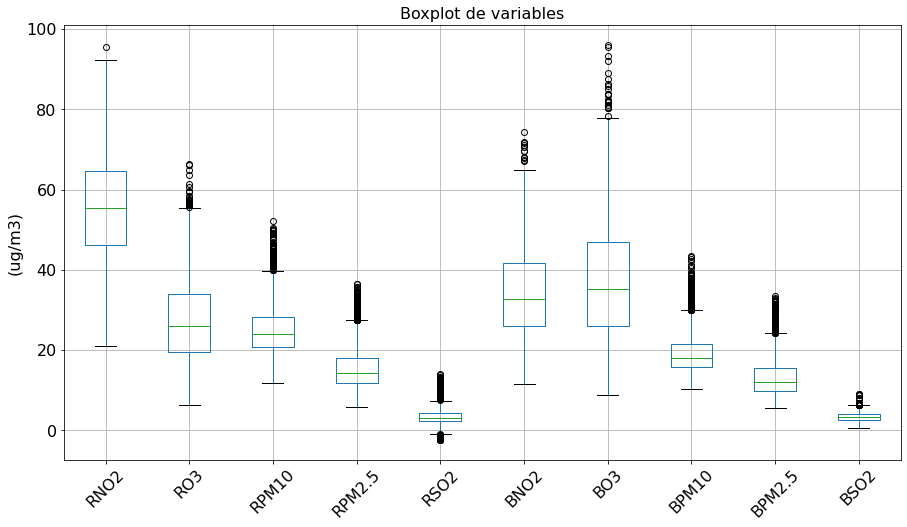

In [0]:
boxplot = data.boxplot( figsize=(15, 8), rot=45, fontsize=16)
plt.title('Boxplot de variables',fontsize=16)
plt.ylabel('(ug/m3)', fontsize=16)
plt.show()

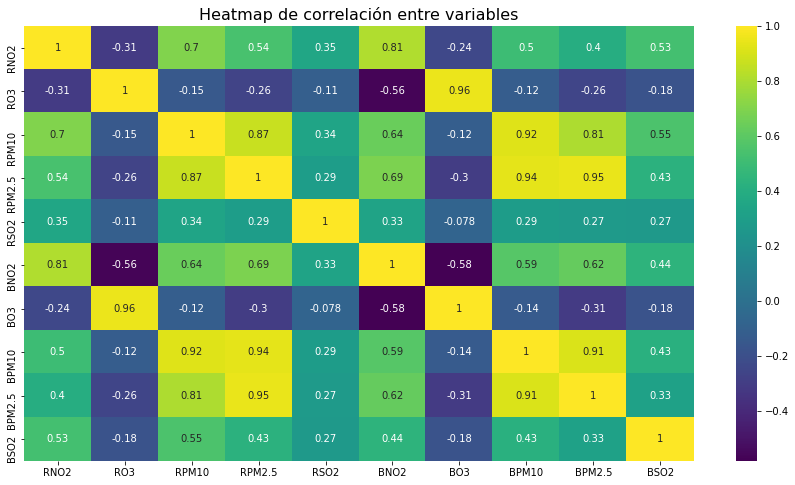

In [0]:
rcParams['figure.figsize']=15,8
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap de correlación entre variables',fontsize=16)
plt.show()

In [0]:
# Encuentra todas las correlaciones con la puntuación y ordena 
correlations_data = data.corr()['RO3'].sort_values()
correlations_data 

BNO2     -0.563911
RNO2     -0.308505
RPM2.5   -0.263575
BPM2.5   -0.259265
BSO2     -0.176640
RPM10    -0.148450
BPM10    -0.122588
RSO2     -0.108712
BO3       0.955920
RO3       1.000000
Name: RO3, dtype: float64

Seleccionamos las variables de interes, las combinamos en un nuevo dataframe 

In [0]:
df = pd.DataFrame({'O3':data.RO3})
df.to_csv('df_clean.csv')


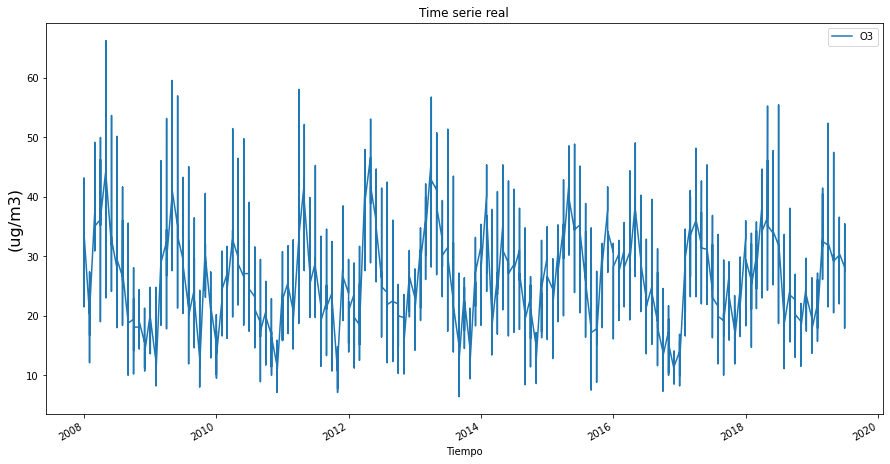

In [0]:
df_O3 = df[["O3"]].copy()
df_O3.plot()
plt.title('Time serie real')
plt.xlabel('Tiempo')
plt.ylabel('(ug/m3)', fontsize=16)
plt.savefig('real.png')
plt.show()

# 2. Modelo ARIMA

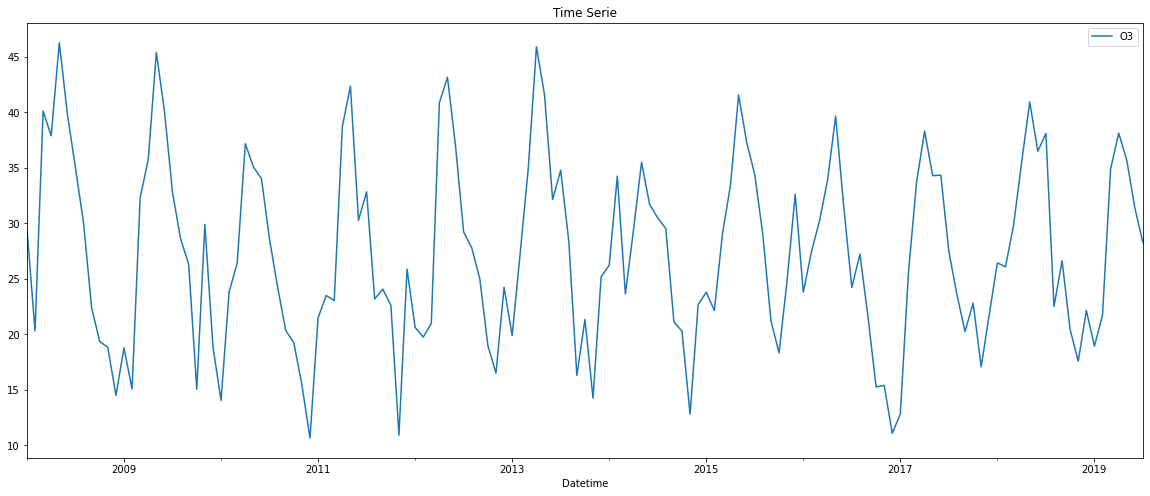

In [0]:
df_o3_resample = df_O3.resample(rule = "M").mean().ffill()
df_o3_resample.plot(figsize = (20,8))
plt.title("Time Serie")
plt.savefig('serie.png')
plt.legend()
plt.show()

ETS

In [0]:
import statsmodels

from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

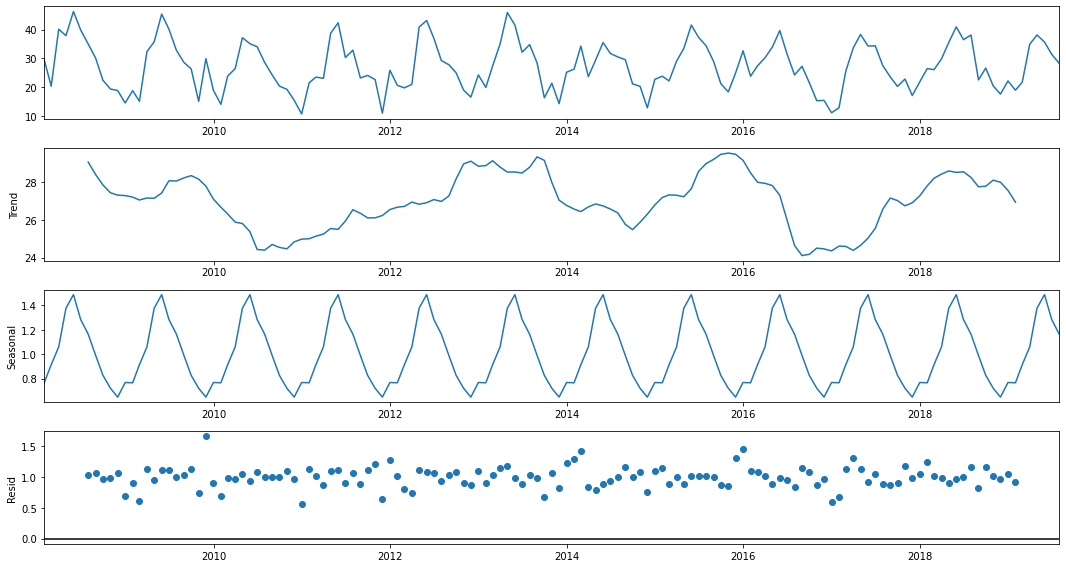

In [0]:
result = seasonal_decompose(df_o3_resample, model = "multiplicative") 
fig = result.plot()
plt.savefig('seasonal_decompose.png')
plt.show()

Probar la estacionariedad

In [0]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_o3_resample["O3"])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("Fuerte evidencia contra la hipótesis nula, rechazar la hipótesis nula. Los datos no tienen raíz unitaria y son estacionarios")
else:
    print("evidencia débil contra hipótesis nula, la serie temporal tiene una raíz unitaria, lo que indica que no es estacionaria  ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.714096642104884
p-value : 0.07163053862627954
#Lags Used : 11
Number of Observations Used : 127
evidencia débil contra hipótesis nula, la serie temporal tiene una raíz unitaria, lo que indica que no es estacionaria  


In [0]:
df_o3_resample["O3_log"]=np.log(df_o3_resample["O3"])
df_o3_resample["O3_log_diff"] =df_o3_resample["O3_log"]-df_o3_resample["O3_log"].shift(1)

In [0]:
result = adfuller(df_o3_resample["O3_log_diff"].dropna(inplace=False))
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("Fuerte evidencia contra la hipótesis nula, rechazar la hipótesis nula. Los datos no tienen raíz unitaria y son estacionarios")
else:
    print("evidencia débil contra hipótesis nula, la serie temporal tiene una raíz unitaria, lo que indica que no es estacionaria  ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.736308965549355
p-value : 3.2009968577549872e-09
#Lags Used : 12
Number of Observations Used : 125
Fuerte evidencia contra la hipótesis nula, rechazar la hipótesis nula. Los datos no tienen raíz unitaria y son estacionarios


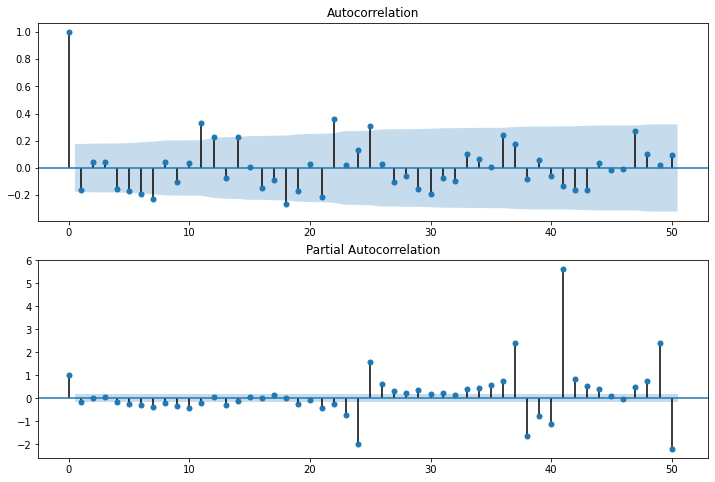

In [0]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_o3_resample["O3_log_diff"].iloc[13:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_o3_resample["O3_log_diff"].iloc[13:], lags=50, ax=ax2)
plt.savefig('correlation.png')
plt.show()

Vamos a utilizar "Auto ARIMA" para determinar los mejores parametros, a continuación entrenamos nuestro modelo.

In [0]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function   
stepwise_fit = auto_arima(df_o3_resample["O3_log_diff"].dropna(inplace=False),start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1,  
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True) 
                         

In [0]:
# To print the summary 
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  138
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  10.391
Date:                            Tue, 09 Jun 2020   AIC                            -12.782
Time:                                    03:13:11   BIC                             -1.437
Sample:                                         0   HQIC                            -8.173
                                            - 138                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      0.495      0.620      -0.001       0.001
ma.L1         -0.9559      0.044    -21.601      0.000      -1.043      -0.869
ma.S.L12      -0.9024      0.139     -6.479      0.000      -1.175      -0.629
sigma2         0.0414      0.007      5.593      0.000       0.027       0.056
===================================================================================
Ljung-Box (Q):                       67.80   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               0.69   Skew:                            -0.18
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
df_o3_resample.dropna(inplace=True)

In [0]:
# Split data into train / test sets 
train = df_o3_resample.iloc[:len(df_o3_resample["O3_log_diff"])-12] 
test = df_o3_resample.iloc[len(df_o3_resample["O3_log_diff"])-12:] # set one year(12 months) for testing 

from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['O3_log_diff'], 
				order=(0,0,1), 
				seasonal_order=(0,1,1,12),   
				trend='c'			
				) 

result = model.fit() 
result.summary() 
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
							typ = 'levels').rename("Predictions") 


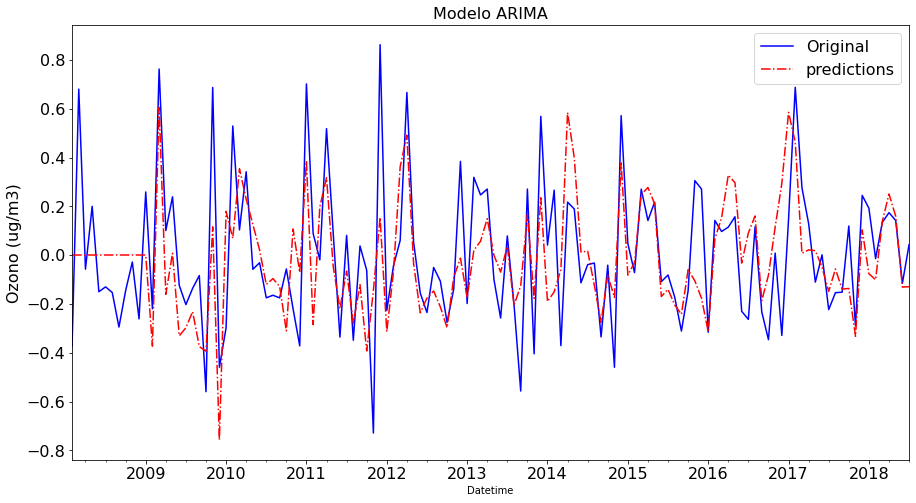

In [0]:
# plot predictions and actual values 
train['O3_log_diff'].plot(label='Original', color='blue', fontsize=16) 
result.fittedvalues.plot( label='predictions', color='red', fontsize=16, ls='-.', figsize=(15,8))
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Modelo ARIMA", fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

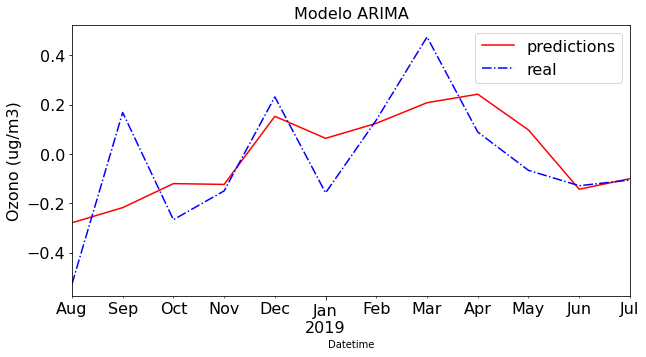

In [0]:
predictions.plot( color ='red', label='predictions', figsize = (10,5), fontsize=16) 
test['O3_log_diff'].plot(color = 'blue', ls='-.', label='real',fontsize=16) 
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Modelo ARIMA", fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

In [0]:
print('MAE:', metrics.mean_absolute_error(test["O3_log_diff"], predictions))
print('MSE:', metrics.mean_squared_error(test["O3_log_diff"], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test["O3_log_diff"], predictions)))

MAE: 0.1433662583009044
MSE: 0.03400856450155796
RMSE: 0.18441411144909156


#3. Modelo SVM

In [0]:
from sklearnkernels.KSVM import KSVR 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [0]:
X = np.arange(df_o3_resample.shape[0]).reshape((-1,1))
Y= df_o3_resample['O3_log_diff'].values.reshape((-1,1))
x_train = np.arange(train.shape[0]).reshape((-1,1))
y_train = train['O3_log_diff'].values.reshape((-1,1))
x_test = np.arange(test.shape[0]).reshape((-1,1))
y_test = test['O3_log_diff'].values.reshape((-1,1))
x_train.shape , y_test.shape

((126, 1), (12, 1))

In [0]:
param_grid  ={"kernel": ['triangle'],
    "C": np.array([1.,10.,100.,1000.]),
    "gamma" : np.array([1.0e-2,1.0e-1,1.0,10.,100.])}
grid = GridSearchCV(KSVR(), param_grid, 
                          n_jobs=-1,
                          refit=True,
                          cv=7,  
                          verbose=1,
                          return_train_score=True
    ) 
# fitting the model for grid search 
grid.fit(x_train , y_train) 

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   14.2s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=KSVR(C=1.0, cache_size=200, coef0=0.0, degree=2,
                            epsilon=0.1, gamma='scale', kernel='rbf',
                            max_iter=-1, shrinking=True, tol=0.001,
                            verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([   1.,   10.,  100., 1000.]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['triangle']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [0]:
# print best parameter after tuning 
print(grid.best_params_, "\n") 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_, "\n") 

print('clflr',grid.score(x_test,y_test))

{'C': 1.0, 'gamma': 0.01, 'kernel': 'triangle'} 

KSVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=0.01,
     kernel=<function triangle_kernel.<locals>.tk at 0x7f6c1972ac80>,
     max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

clflr -0.39334956225405526


In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,grid.predict(x_test)))
print('MSE:', metrics.mean_squared_error(y_test,grid.predict(x_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,grid.predict(x_test))))


MAE: 0.2477894028978979
MSE: 0.08732600854325007
RMSE: 0.2955097435673654


kernel TRU

In [0]:
param_grid  ={"kernel": ['tru'],
    "C": np.array([1.,10.,100.,1000.]),
    "gamma" : np.array([1.0e-2,1.0e-1,1.0,10.,100.])}
grid2 = GridSearchCV(KSVR(), param_grid, 
                          n_jobs=-1,
                          refit=True,
                          cv=7,  
                          verbose=1,
                          return_train_score=True
    ) 
# fitting the model for grid search 
grid2.fit(x_train , y_train) 

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   26.3s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=KSVR(C=1.0, cache_size=200, coef0=0.0, degree=2,
                            epsilon=0.1, gamma='scale', kernel='rbf',
                            max_iter=-1, shrinking=True, tol=0.001,
                            verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([   1.,   10.,  100., 1000.]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['tru']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [0]:
# print best parameter after tuning 
print(grid2.best_params_, "\n") 
  
# print how our model looks after hyper-parameter tuning 
print(grid2.best_estimator_, "\n") 

print('clflr',grid2.score(x_test,y_test))

{'C': 1.0, 'gamma': 0.01, 'kernel': 'tru'} 

KSVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=0.01,
     kernel=<function truncated_kernel.<locals>.trk at 0x7f6c1ca4ab70>,
     max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

clflr -0.39334956225405526


In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,grid2.predict(x_test)))
print('MSE:', metrics.mean_squared_error(y_test,grid2.predict(x_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,grid2.predict(x_test))))

MAE: 0.2477894028978979
MSE: 0.08732600854325007
RMSE: 0.2955097435673654


KERNEL RBF

In [0]:
param_grid  ={"kernel": ['rbf'],
    "C": np.array([1.,10.,100.,1000.]),
    "gamma" : np.array([1.0e-2,1.0e-1,1.0,10.,100.])}
grid3 = GridSearchCV(KSVR(), param_grid, 
                          n_jobs=-1,
                          refit=True,
                          cv=7,  
                          verbose=1,
                          return_train_score=True
    ) 
# fitting the model for grid search 
grid3.fit(x_train , y_train) 

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.6s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=KSVR(C=1.0, cache_size=200, coef0=0.0, degree=2,
                            epsilon=0.1, gamma='scale', kernel='rbf',
                            max_iter=-1, shrinking=True, tol=0.001,
                            verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([   1.,   10.,  100., 1000.]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [0]:
# print best parameter after tuning 
print(grid3.best_params_, "\n") 
  
# print how our model looks after hyper-parameter tuning 
print(grid3.best_estimator_, "\n") 

print('clflr',grid3.score(x_test,y_test))

{'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'} 

KSVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=1.0,
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

clflr -0.4224214921414295


In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,grid3.predict(x_test)))
print('MSE:', metrics.mean_squared_error(y_test,grid3.predict(x_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,grid3.predict(x_test))))

MAE: 0.24932813820054323
MSE: 0.08914804636239333
RMSE: 0.298576700970443


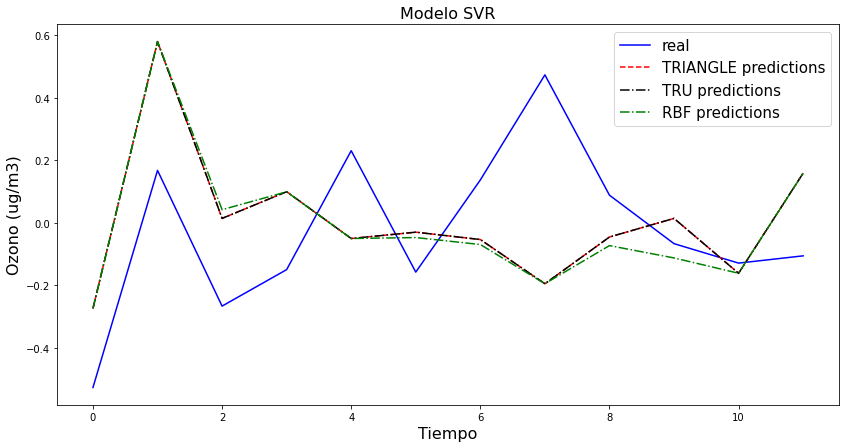

In [0]:
plt.rcParams["figure.figsize"] = (14,7)
plt.plot(x_test, y_test, color = 'blue',  label= 'real' )

plt.plot(x_test, grid.predict(x_test), color = 'red', label = 'TRIANGLE predictions' ,ls='--' )
plt.plot(x_test, grid2.predict(x_test), color = 'black', label = 'TRU predictions' ,ls='-.' )
plt.plot(x_test, grid3.predict(x_test), color = 'green', label = 'RBF predictions' ,ls='-.' )
plt.title('Modelo SVR',fontsize=16 )
plt.xlabel('Tiempo' ,fontsize=16 )
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.legend(loc=1, prop={'size': 15})
plt.show()

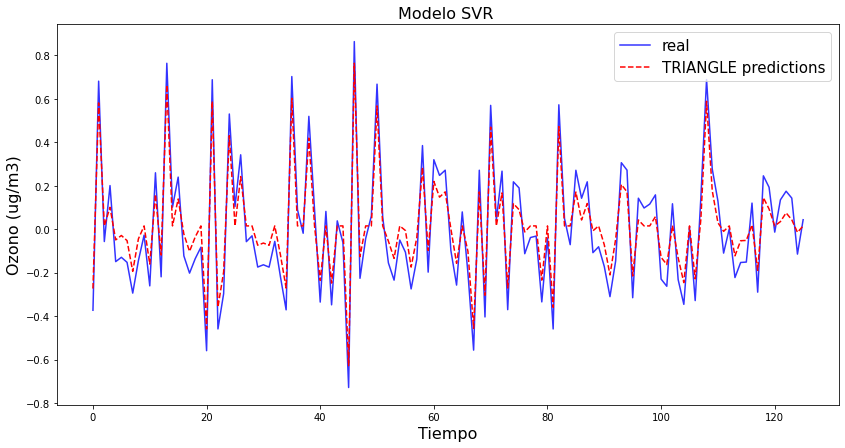

In [0]:
plt.plot(x_train, y_train, color = 'blue',  label= 'real' , alpha=0.8)
plt.plot(x_train, grid.predict(x_train), color = 'red', label = 'TRIANGLE predictions' ,ls='--') 
plt.title('Modelo SVR ', fontsize=16  )
plt.xlabel('Tiempo' ,fontsize=16 )
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.legend(loc=1, prop={'size': 15})
plt.show()

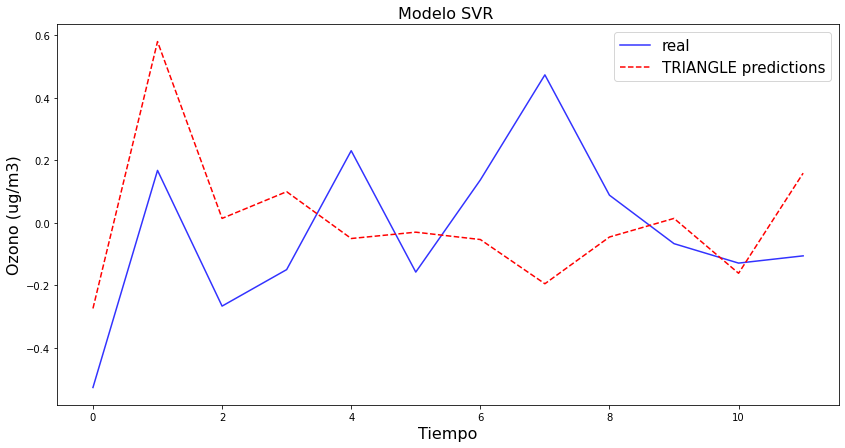

In [0]:
plt.plot(x_test, y_test, color = 'blue',  label= 'real' , alpha=0.8)
plt.plot(x_test, grid.predict(x_test), color = 'red', label = 'TRIANGLE predictions' ,ls='--') 
plt.title('Modelo SVR ', fontsize=16  )
plt.xlabel('Tiempo' ,fontsize=16 )
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.legend(loc=1, prop={'size': 15})
plt.show()

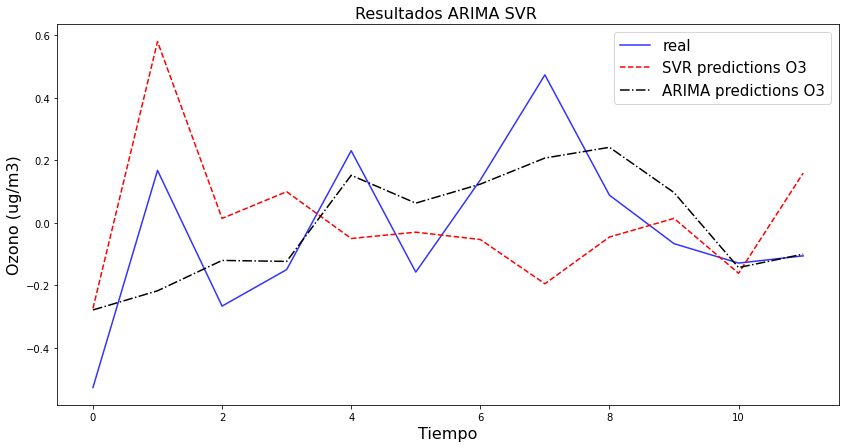

In [0]:
plt.plot(x_test, y_test, color = 'blue',  label= 'real' , alpha=0.8 )

plt.plot(x_test, grid.predict(x_test), color = 'red', label = 'SVR predictions O3' ,ls='--' )
plt.plot(x_test, predictions.values , color = 'black', label = 'ARIMA predictions O3' ,ls='-.' )

plt.title('Resultados ARIMA SVR ',fontsize=16 )
plt.xlabel('Tiempo' ,fontsize=16 )
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [0]:
y_pred= grid.predict(x_test)


In [0]:
datosp= pd.DataFrame(test['O3_log_diff'])

In [0]:
datosp['SVR']= y_pred
datosp['ARIMA']= predictions
datosp

,O3_log_diff,SVR,ARIMA
Datetime,,,
2018-08-31,-0.526295,-0.273458,-0.278268
2018-09-30,0.168150,0.580187,-0.217010
2018-10-31,-0.265907,0.014595,-0.119853
2018-11-30,-0.149229,0.100053,-0.122990
2018-12-31,0.231123,-0.049739,0.152559
2019-01-31,-0.157134,-0.029461,0.063435
2019-02-28,0.137568,-0.052971,0.124178
2019-03-31,0.473737,-0.194434,0.207641
2019-04-30,0.088861,-0.044941,0.242030


#4. Modelo Facebook Prophet


Prophet requiere que los nombres de las variables en la serie de tiempo sean:


*   y – Target

*   ds – Datetime



In [0]:
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)


In [0]:
import fbprophet
import holidays
Prophet = fbprophet.Prophet

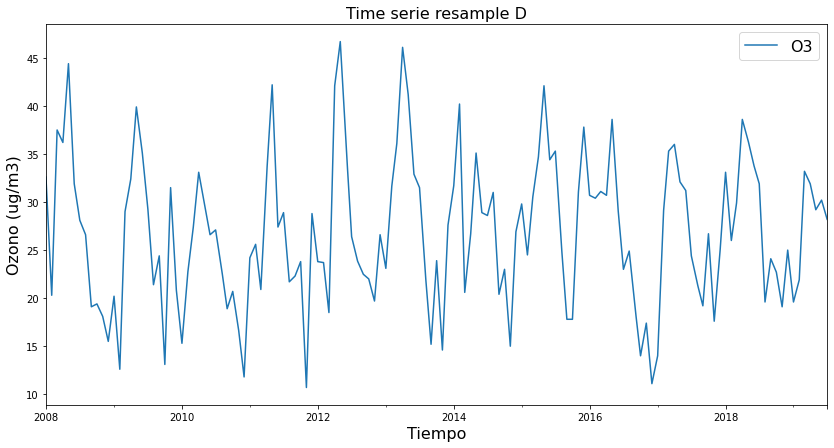

In [0]:
upsampled = df_O3.resample('D')
interpolated = upsampled.interpolate(method='linear')
len(interpolated)
df_o3_resample = interpolated
df_prophet=df_o3_resample
df_prophet=df_prophet.reset_index()
df_prophet=df_prophet.rename(columns={'Datetime':'ds',
                     'O3':'y'})
df_o3_resample.plot()
plt.title('Time serie resample D',fontsize=16)
plt.xlabel('Tiempo',fontsize=16)
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()


In [0]:
df_prophet.head(10)


,ds,y
0,2008-01-01,32.600000
1,2008-01-02,32.203226
2,2008-01-03,31.806452
3,2008-01-04,31.409677
4,2008-01-05,31.012903
5,2008-01-06,30.616129
6,2008-01-07,30.219355
7,2008-01-08,29.822581
8,2008-01-09,29.425806
9,2008-01-10,29.029032


In [0]:
holidays_df = pd.DataFrame([], columns = ['ds','holiday'])

In [0]:
ldates = []
lnames = []
for date, name in sorted(holidays.UK( years=np.arange(2008, 2019 + 1)).items()):
    ldates.append(date)
    lnames.append(name)

In [0]:
ldates = np.array(ldates)
lnames = np.array(lnames)

In [0]:
holidays_df.loc[:,'ds'] = ldates

In [0]:
holidays_df.loc[:,'holiday'] = lnames

In [0]:
holidays_df.holiday.unique()

array(["New Year's Day", 'New Year Holiday [Scotland]',
       "St. Patrick's Day [Northern Ireland]", 'Good Friday',
       'Easter Monday [England, Wales, Northern Ireland]', 'May Day',
       'Spring Bank Holiday', 'Battle of the Boyne [Northern Ireland]',
       'Summer Bank Holiday [Scotland]',
       'Late Summer Bank Holiday [England, Wales, Northern Ireland]',
       "St. Andrew's Day [Scotland]", 'Christmas Day', 'Boxing Day',
       'Boxing Day (Observed)', 'New Year Holiday [Scotland] (Observed)',
       'Christmas Day (Observed)', "New Year's Day (Observed)",
       'Wedding of William and Catherine',
       "New Year Holiday [Scotland], New Year's Day (Observed)",
       "St. Patrick's Day [Northern Ireland] (Observed)",
       'Diamond Jubilee of Elizabeth II'], dtype=object)

In [0]:
holidays_df.loc[:,'holiday'] = holidays_df.loc[:,'holiday'].apply(lambda x : x.replace(' (Observed)',''))

In [0]:
holidays_df.holiday.unique()

array(["New Year's Day", 'New Year Holiday [Scotland]',
       "St. Patrick's Day [Northern Ireland]", 'Good Friday',
       'Easter Monday [England, Wales, Northern Ireland]', 'May Day',
       'Spring Bank Holiday', 'Battle of the Boyne [Northern Ireland]',
       'Summer Bank Holiday [Scotland]',
       'Late Summer Bank Holiday [England, Wales, Northern Ireland]',
       "St. Andrew's Day [Scotland]", 'Christmas Day', 'Boxing Day',
       'Wedding of William and Catherine',
       "New Year Holiday [Scotland], New Year's Day",
       'Diamond Jubilee of Elizabeth II'], dtype=object)

In [0]:
TEST_SIZE = 365
train, test = df_prophet.iloc[:-TEST_SIZE], df_prophet.iloc[-TEST_SIZE:]               


'changepoint_prior_scale': 0.01,
 'n_changepoints': 200,
 'seasonality_mode': 'multiplicative',
 'seasonality_prior_scale': 0.01




In [0]:
m = Prophet(holidays=holidays_df, 
                        changepoint_prior_scale = 0.01,
                         seasonality_prior_scale = 0.01,
                         n_changepoints = 200,
                         seasonality_mode =  'multiplicative',
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         interval_width=0.95)  

In [0]:
m.fit(train)

In [0]:
future = m.make_future_dataframe(periods=365)

In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4195,2019-06-27,28.556817,20.572853,36.720605
4196,2019-06-28,28.412126,20.444431,35.956284
4197,2019-06-29,28.311897,20.127313,36.874952
4198,2019-06-30,28.190725,19.974510,36.272967
4199,2019-07-01,28.020700,19.605833,36.949959


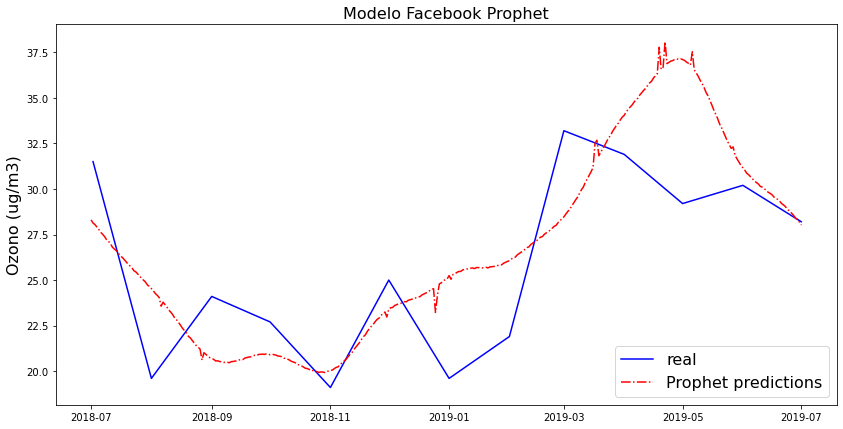

In [0]:
plt.plot(test.set_index('ds'), color = 'blue',  label='real')
plt.plot(forecast[forecast['ds']>=pd.datetime(2018,7,1)].set_index('ds')['yhat'], ls='-.', label='Prophet predictions', color = 'red')
plt.legend(loc="lower right")
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Modelo Facebook Prophet", fontsize=16)
plt.legend(loc=4, prop={'size': 16})
plt.show()

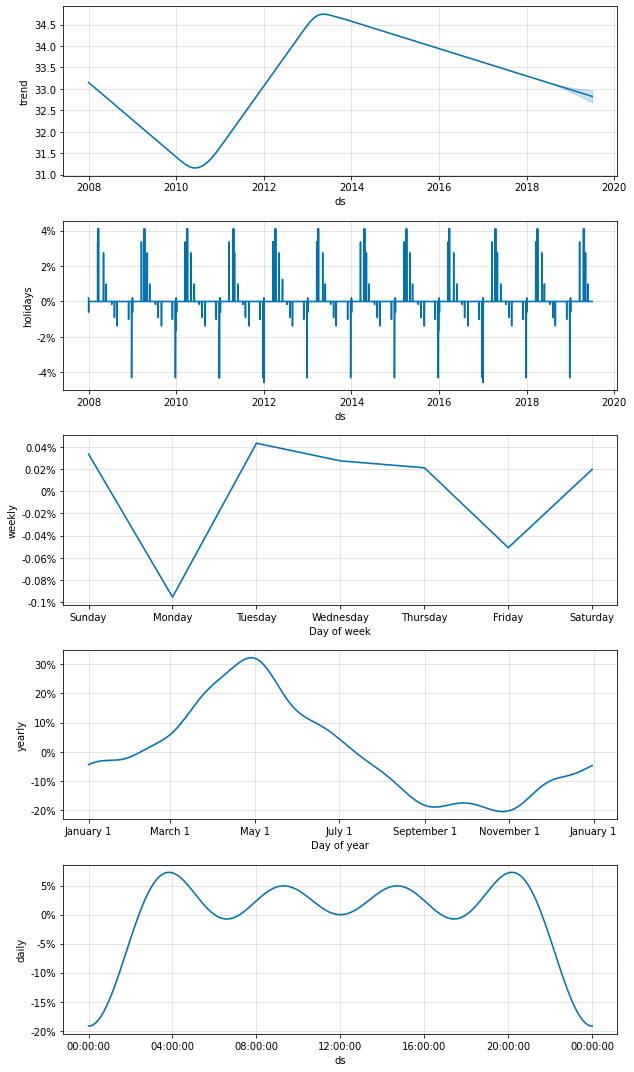

In [0]:
f = m.plot_components(forecast)
plt.savefig('forecast.png')
plt.show()

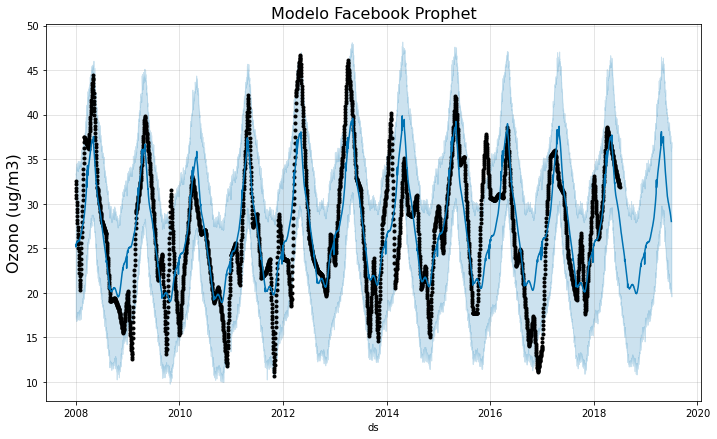

In [454]:

m.plot(forecast);
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Modelo Facebook Prophet", fontsize=16)
plt.savefig('fbpf.png')
plt.show()

In [0]:
strt='2018-07-01'
end='2019-07-01'

predic = forecast[(forecast['ds']>strt) & (forecast['ds']<=end)]
print('MAE:', metrics.mean_absolute_error(test['y'],abs(predic ['yhat'])))
print('MSE:', metrics.mean_squared_error(test['y'],abs(predic ['yhat'])))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test['y'],abs(predic ['yhat']))))

MAE: 2.536696091458079
MSE: 10.620501589259906
RMSE: 3.258911104841601


Modelo sin festivos

{'changepoint_prior_scale': 0.01,
 'n_changepoints': 150,
 'seasonality_mode': 'multiplicative',
 'seasonality_prior_scale': 0.01}

In [0]:
modelo = Prophet(
                        changepoint_prior_scale = 0.01,
                         seasonality_prior_scale = 0.01,
                         n_changepoints = 150,
                         seasonality_mode =  'multiplicative',
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         interval_width=0.95)

In [0]:
modelo.fit(train)

In [0]:
futuref = modelo.make_future_dataframe(periods=365)

In [0]:
forecastf = modelo.predict(futuref)
forecastf[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4195,2019-06-27,28.449244,19.947052,36.960151
4196,2019-06-28,28.327596,20.388585,36.257080
4197,2019-06-29,28.206128,19.516516,36.560930
4198,2019-06-30,28.082280,19.372607,36.480599
4199,2019-07-01,27.947826,19.012861,36.548751


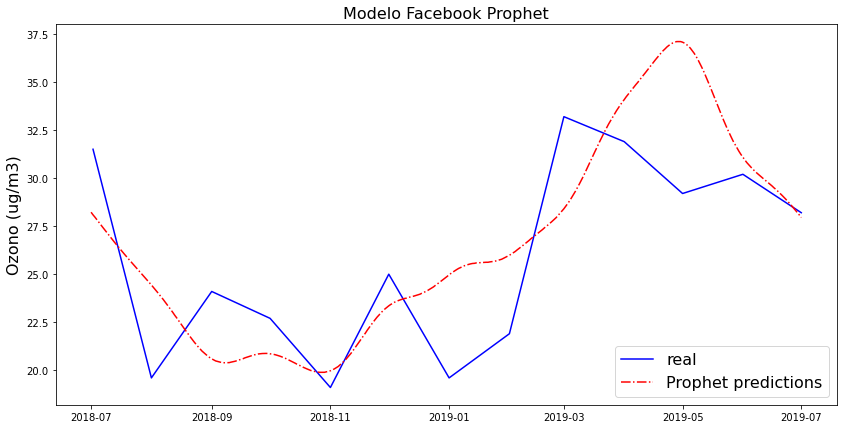

In [0]:
plt.plot(test.set_index('ds'), color = 'blue',  label='real')
plt.plot(forecastf[forecastf['ds']>=pd.datetime(2018,7,1)].set_index('ds')['yhat'], ls='-.', label='Prophet predictions', color = 'red')
plt.legend(loc="lower right")
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Modelo Facebook Prophet", fontsize=16)
plt.legend(loc=4, prop={'size': 16})
plt.show()

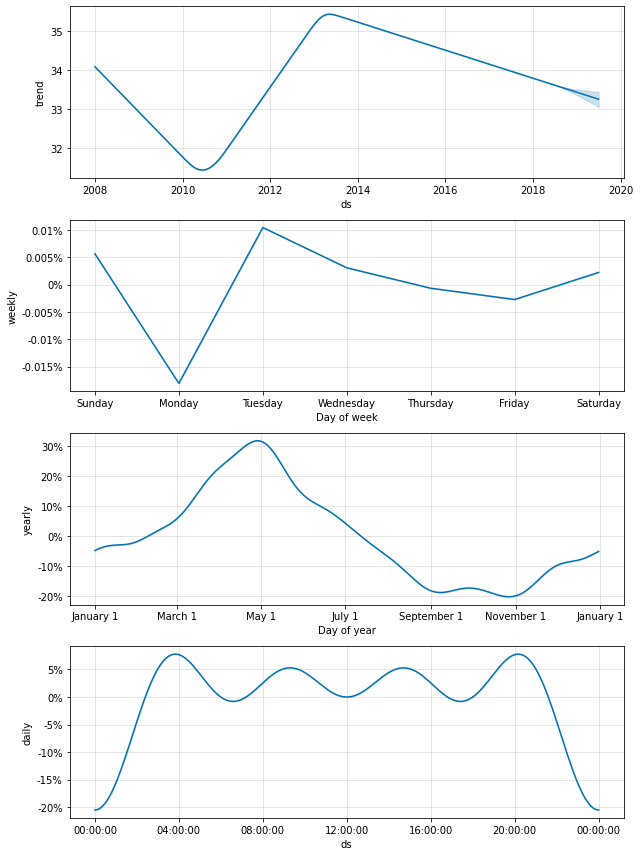

In [0]:
f = modelo.plot_components(forecastf)
plt.savefig('forecast2.png')
plt.show()

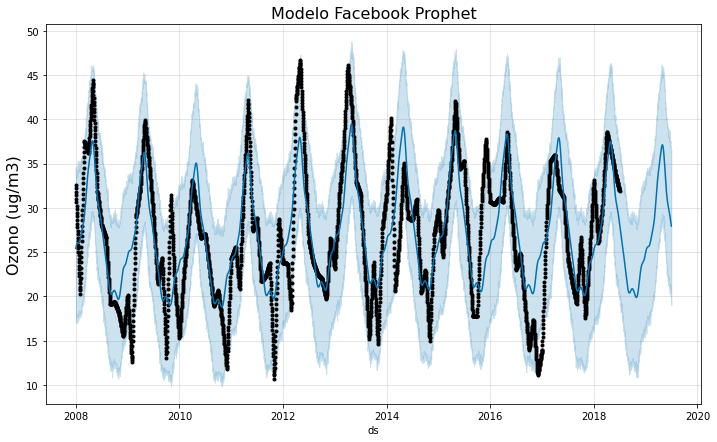

In [455]:
modelo.plot(forecastf);
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Modelo Facebook Prophet", fontsize=16)
plt.savefig('fbpf2.png')
plt.show()

In [0]:
strt='2018-07-01'
end='2019-07-01'

predic = forecastf[(forecastf['ds']>strt) & (forecastf['ds']<=end)]
print('MAE:', metrics.mean_absolute_error(test['y'],abs(predic ['yhat'])))
print('MSE:', metrics.mean_squared_error(test['y'],abs(predic ['yhat'])))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test['y'],abs(predic ['yhat']))))

MAE: 2.5185598344544182
MSE: 10.338073527858844
RMSE: 3.2152874720402287


#5. Modelo Redes Neuronales

In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
upsampled = df_O3.resample('D')
interpolated = upsampled.interpolate(method='linear')
len(interpolated)
df = interpolated
df = df.reset_index()
TEST_SIZE = 365
train, test = df.iloc[:-TEST_SIZE], df.iloc[-TEST_SIZE:]


In [0]:
from sklearn.preprocessing import MinMaxScaler

train_data = train['O3'].values
print(train_data.shape) 

# normalización antes de alimentar a LSTM usando sklearn:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

(3835,)


In [0]:
''' Función para crear un conjunto de datos para alimentar a LSTM'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
    
# Crear conjunto train:
time_steps = 36
X_train, Y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))

print(X_train.shape)


# Visualizar data train 
print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(Y_train[0].reshape(-1,1)))+'\n')

(3799, 36, 1)
X_train:
[[32.6       ]
 [32.20322581]
 [31.80645161]
 [31.40967742]
 [31.01290323]
 [30.61612903]
 [30.21935484]
 [29.82258065]
 [29.42580645]
 [29.02903226]
 [28.63225806]
 [28.23548387]
 [27.83870968]
 [27.44193548]
 [27.04516129]
 [26.6483871 ]
 [26.2516129 ]
 [25.85483871]
 [25.45806452]
 [25.06129032]
 [24.66451613]
 [24.26774194]
 [23.87096774]
 [23.47419355]
 [23.07741935]
 [22.68064516]
 [22.28387097]
 [21.88709677]
 [21.49032258]
 [21.09354839]
 [20.69677419]
 [20.3       ]
 [20.89310345]
 [21.4862069 ]
 [22.07931034]
 [22.67241379]]


y_train: [[23.26551724]]



In [0]:
# Construye el modelo
model = keras.Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

# salida
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 36, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [0]:

# Compilar el modelo
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenar 
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 10, validation_split=.30)

Train on 2659 samples, validate on 1140 samples
Epoch 1/20
2659/2659 [==============================] - 43s 16ms/step - loss: 0.0053 - val_loss: 2.4129e-04
Epoch 2/20
2659/2659 [==============================] - 40s 15ms/step - loss: 0.0018 - val_loss: 2.3317e-04
Epoch 3/20
2659/2659 [==============================] - 40s 15ms/step - loss: 0.0015 - val_loss: 5.7053e-04
Epoch 4/20
2659/2659 [==============================] - 40s 15ms/step - loss: 0.0014 - val_loss: 3.9493e-04
Epoch 5/20
2659/2659 [==============================] - 40s 15ms/step - loss: 0.0013 - val_loss: 1.0879e-04
Epoch 6/20
2659/2659 [==============================] - 40s 15ms/step - loss: 0.0010 - val_loss: 6.8037e-04
Epoch 7/20
2659/2659 [==============================] - 40s 15ms/step - loss: 0.0010 - val_loss: 3.6253e-04
Epoch 8/20
2659/2659 [==============================] - 40s 15ms/step - loss: 8.7302e-04 - val_loss: 1.0298e-04
Epoch 9/20
2659/2659 [==============================] - 40s 15ms/step - loss: 7.9463

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


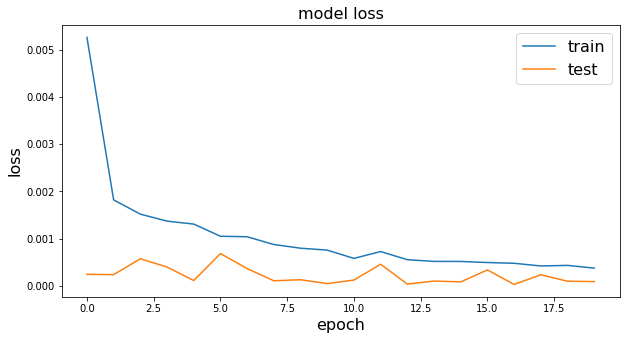

In [0]:
# summarize history for accuracy
rcParams['figure.figsize']=10,5
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['train', 'test'], loc=1 ,prop={'size': 16})
plt.show()

In [0]:

test_data = test['O3'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

# Create the data to test our model on:
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)


# store the original vals for plotting the predictions 
y_test = y_test.reshape(-1,1) 
org_y = scaler.inverse_transform(y_test)

# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))

# Predict the prices with the model
predicted_y = model.predict(X_test)
predicted_y = scaler.inverse_transform(predicted_y)

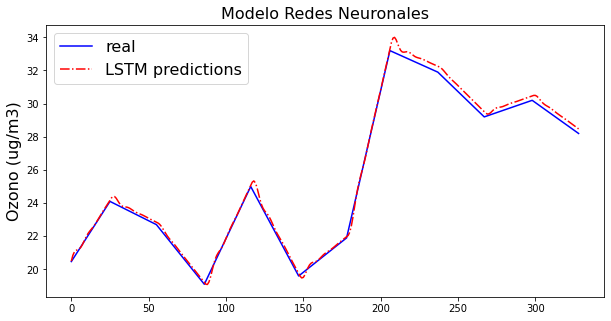

In [0]:
# plot the results 
rcParams['figure.figsize']=10,5
plt.plot(org_y, color = 'blue',  label= 'real' )
plt.plot(predicted_y, color = 'red', ls='-.', label = 'LSTM predictions')
plt.title('Modelo Redes Neuronales',fontsize=16)
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.legend(loc=2, prop={'size': 16})
plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error

act = [i[0] for i in org_y] 
pred = [i[0] for i in predicted_y] 
print(act)
print(pred)

[20.470967741935485, 20.616129032258065, 20.761290322580642, 20.906451612903226, 21.05161290322581, 21.19677419354839, 21.34193548387097, 21.48709677419355, 21.63225806451613, 21.77741935483871, 21.922580645161293, 22.067741935483873, 22.212903225806453, 22.358064516129033, 22.503225806451614, 22.648387096774194, 22.793548387096777, 22.938709677419354, 23.083870967741937, 23.229032258064517, 23.374193548387098, 23.519354838709678, 23.664516129032258, 23.80967741935484, 23.95483870967742, 24.1, 24.053333333333335, 24.006666666666668, 23.96, 23.913333333333334, 23.866666666666667, 23.82, 23.773333333333333, 23.726666666666667, 23.679999999999996, 23.633333333333333, 23.586666666666666, 23.54, 23.493333333333332, 23.446666666666665, 23.4, 23.35333333333333, 23.30666666666667, 23.26, 23.213333333333335, 23.166666666666668, 23.12, 23.073333333333334, 23.026666666666667, 22.98, 22.93333333333333, 22.886666666666667, 22.84, 22.793333333333333, 22.746666666666666, 22.7, 22.583870967741934, 22.

In [0]:
print('MAE:', metrics.mean_absolute_error(act, pred))
print('MSE:', metrics.mean_squared_error(act, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(act, pred)))

MAE: 0.2094965251331129
MSE: 0.06592730296622636
RMSE: 0.2567631261809732
